In [43]:
pip install descartes

Note: you may need to restart the kernel to use updated packages.


In [1]:
import geopandas as gp
import fiona
import pandas as pd
import matplotlib 
import shapely

In [2]:
polygons = gp.read_file("cps/shapes_cps\CP_CdMx/CP_09CdMx_v2.shp")
df = pd.read_csv("Casas Todos Estados.csv",low_memory = False)

#polygons.crs = {'init':'epsg:4326'}
polygons = polygons.to_crs({'init':'epsg:4326'})


DriverError: cps/shapes_cps\CP_CdMx/CP_09CdMx_v2.shp: No such file or directory

In [185]:
polygons.crs

<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [186]:
polygons.head()

,d_cp,geometry
0,01000,"POLYGON ((-99.18764 19.34674, -99.18813 19.345..."
1,01010,"POLYGON ((-99.19130 19.36363, -99.19109 19.363..."
2,01020,"POLYGON ((-99.18268 19.36235, -99.18302 19.361..."
3,01030,"POLYGON ((-99.17672 19.36411, -99.17510 19.362..."
4,01040,"POLYGON ((-99.19036 19.35190, -99.19044 19.351..."


In [177]:
polygons.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1404 entries, 0 to 1403
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   d_cp      1404 non-null   object  
 1   geometry  1404 non-null   geometry
dtypes: geometry(1), object(1)
memory usage: 22.1+ KB


In [187]:
polygons.crs

<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [188]:
polygons.head()

,d_cp,geometry
0,01000,"POLYGON ((-99.18764 19.34674, -99.18813 19.345..."
1,01010,"POLYGON ((-99.19130 19.36363, -99.19109 19.363..."
2,01020,"POLYGON ((-99.18268 19.36235, -99.18302 19.361..."
3,01030,"POLYGON ((-99.17672 19.36411, -99.17510 19.362..."
4,01040,"POLYGON ((-99.19036 19.35190, -99.19044 19.351..."


In [189]:
gdf = gp.GeoDataFrame(df, geometry=gp.points_from_xy(df.Lon, df.Lat))


In [190]:
gdf.crs = {'init': 'epsg:4326'}

/home/mario/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [191]:
gdf.crs

<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [58]:
#df.query('Estado == "Distrito Federal"', inplace = True)

In [1]:
new_dataframe = gp.sjoin(gdf, polygons, how='left')

SyntaxError: invalid syntax (<ipython-input-1-c51d18a3968b>, line 1)

In [195]:
new_dataframe.head()

,Marca,Clasificacion,Tipo,Estado,Municipio,Colonia,Colonia2,Street,Price,Moneda,...,Banos,Medio_Bano,Estacionamientos,CordA,URL,Lat,Lon,geometry,index_right,d_cp
0,Inmuebles24,Casa,Venta,Aguascalientes,Aguascalientes,Fraccionamiento Rancho Santa Mónica,Casas en Preventa en Privada Caranday Zona Ran...,Casas EN Preventa EN Privada Caranday Zona R...,"MN 1,176,598",MN,...,2.0,1.0,1,"21.839307399999999,-102.318483099999994",https://www.inmuebles24.com/propiedades/casas-...,21.839307,-102.318483,POINT (-102.31848 21.83931),NaN,NaN
1,Inmuebles24,Casa,Venta,Aguascalientes,Aguascalientes,Fraccionamiento Rancho Santa Mónica,Casa en Venta en San Telmo Country Golf Aguasc...,Casa EN Venta EN SAN Telmo Country Golf Aguasc...,"MN 2,550,000",MN,...,2.0,1.0,0,"21.839307399999999,-102.318483099999994",https://www.inmuebles24.com/propiedades/casa-e...,21.839307,-102.318483,POINT (-102.31848 21.83931),NaN,NaN
2,Inmuebles24,Casa,Venta,Aguascalientes,Aguascalientes,Fraccionamiento Rancho Santa Mónica,Casas en Preventa en Privada Caranday Zona Ran...,Casas EN Preventa EN Privada Caranday Zona Ran...,"MN 1,453,049",MN,...,2.0,1.0,2,"21.839307399999999,-102.318483099999994",https://www.inmuebles24.com/propiedades/casas-...,21.839307,-102.318483,POINT (-102.31848 21.83931),NaN,NaN
3,Inmuebles24,Casa,Venta,Aguascalientes,Aguascalientes,Fraccionamiento Rancho Santa Mónica,Casas en Preventa en Privada Caranday Zona Ran...,Casas EN Preventa EN Privada Caranday Zona Ran...,"MN 1,379,401",MN,...,2.0,1.0,2,"21.839307399999999,-102.318483099999994",https://www.inmuebles24.com/propiedades/casas-...,21.839307,-102.318483,POINT (-102.31848 21.83931),NaN,NaN
4,Inmuebles24,Casa,Venta,Aguascalientes,Aguascalientes,Fraccionamiento Villa Jardín,Casa en Venta en Villa Jardín Al Sur de Aguasc...,"Venta Hermosa Casa EN Villa Jardín,ags., Fracc...","MN 2,700,000",MN,...,2.0,1.0,2,"21.860532200000001,-102.298601800000000",https://www.inmuebles24.com/propiedades/casa-e...,21.860532,-102.298602,POINT (-102.29860 21.86053),NaN,NaN


In [197]:
newdf = new_dataframe[new_dataframe['index_right'].notna()]

In [199]:
newdf

,Marca,Clasificacion,Tipo,Estado,Municipio,Colonia,Colonia2,Street,Price,Moneda,...,Banos,Medio_Bano,Estacionamientos,CordA,URL,Lat,Lon,geometry,index_right,d_cp
576,Inmuebles24,Casa,Venta,Aguascalientes,Aguascalientes,Fraccionamiento Paseos de San Antonio,"Casa en Venta, Haciendas de San Antonio, Calle...","Siracusa 111-A, Fraccionamiento Paseos de San ...","MN 380,000",MN,...,1.0,0.0,1,"19.440172000000000,-99.202518999999995",https://www.inmuebles24.com/propiedades/casa-e...,19.440172,-99.202519,POINT (-99.20252 19.44017),895.0,11520
850,Inmuebles24,Casa,Venta,Aguascalientes,Aguascalientes,La Soledad,Excelente Casa Nueva en Venta con La Mejor Ubi...,"Nyssa 107, La Soledad, Aguascalientes","MN 2,450,000",MN,...,2.0,0.0,2,"19.440172000000000,-99.202518999999995",https://www.inmuebles24.com/propiedades/excele...,19.440172,-99.202519,POINT (-99.20252 19.44017),895.0,11520
2871,Inmuebles24,Desarrollos,Casa,Distrito Federal,Coyoacán,San Francisco CulhuacAn Barrio,Residencial Hidalgo 39,"Hidalgo , San Francisco CulhuacAn Barrio , Coy...","MN 4,550,000",MN,...,NaN,NaN,0,"19.335417900000000,-99.119329700000000",https://www.inmuebles24.com/propiedades/reside...,19.335418,-99.119330,POINT (-99.11933 19.33542),290.0,04260
2872,Inmuebles24,Desarrollos,Casa,Distrito Federal,Cuajimalpa de Morelos,Cuajimalpa,Vita Homes Sta Fe,"Coahuila 320, Cuajimalpa, Cuajimalpa de Morelos","MN 6,950,000",MN,...,NaN,NaN,0,"19.351507458871968,-99.297110415344260",https://www.inmuebles24.com/propiedades/vita-h...,19.351507,-99.297110,POINT (-99.29711 19.35151),372.0,05000
2873,Inmuebles24,Desarrollos,Casa,Distrito Federal,Benito Juárez,Del Valle,Amores 1661.un Estilo de Vida,"amores , Del Valle, Benito Juárez","MN 12,096,700",MN,...,NaN,NaN,0,"19.367336400000000,-99.170566700000000",https://www.inmuebles24.com/propiedades/amores...,19.367336,-99.170567,POINT (-99.17057 19.36734),227.0,03104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35901,Inmuebles24,Casa,Venta,Edo. de México,Naucalpan de Juárez,Lomas Manuel Avila Camacho,Cdv1191.4 - Magníficos Espacios Para Vivir Con...,", Lomas Manuel Avila Camacho, Naucalpan de Juárez","MN 3,590,000",MN,...,2.0,0.0,1,"19.420670999999998,-99.199994500000002",https://www.inmuebles24.com/propiedades/cdv119...,19.420671,-99.199995,POINT (-99.19999 19.42067),859.0,11100
37370,Inmuebles24,Casa,Venta,Edo. de México,Huixquilucan,Jesús del Monte,*remate Bancario* Casa en Venta en Fracc. Jesú...,"Cerrada de Veracruz #2, Jesús del Monte, Huixq...","MN 2,000,000",MN,...,2.0,0.0,2,"19.368053500000000,-99.299594100000000",https://www.inmuebles24.com/propiedades/-remat...,19.368053,-99.299594,POINT (-99.29959 19.36805),372.0,05000
38139,Inmuebles24,Casa,Venta,Edo. de México,Huixquilucan,Jesús del Monte,Hermosa Casa de 3 Niveles a 10 Minutos de Sant...,"Jesus del Monte 75, Jesús del Monte, Huixquilucan","MN 1,550,000",MN,...,2.0,0.0,2,"19.367339100000000,-99.292497499999970",https://www.inmuebles24.com/propiedades/hermos...,19.367339,-99.292497,POINT (-99.29250 19.36734),396.0,05260
43058,Inmuebles24,Casa,Venta,Distrito Federal,Gustavo A. Madero,Vallejo,"Casa Nueva de 3 Recámaras en Venta con Balcon,...","Av. Insurgentes Nte., Vallejo, Ciudad de Méxic...","MN 1,273,000",MN,...,2.0,1.0,2,"19.468078900000000,-99.138577900000000",https://www.inmuebles24.com/propiedades/casa-d...,19.468079,-99.138578,POINT (-99.13858 19.46808),596.0,07870


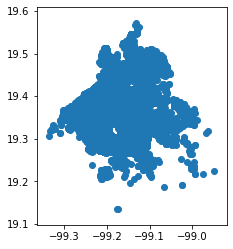

In [200]:
newdf.plot()

In [193]:
gdf.contains(polygons)

0        False
1        False
2        False
3        False
4        False
         ...  
59235    False
59236    False
59237    False
59238    False
59239    False
Length: 59240, dtype: bool

In [161]:
gdf.any()

Marca                    True
Clasificacion            True
Tipo                     True
Estado                   True
Municipio                True
Colonia                  True
Colonia2                 True
Street                   True
Price                    True
Moneda                   True
PriceClean               True
Superficie_Terreno       True
Superficie_Construida    True
Recamaras                True
Banos                    True
Medio_Bano               True
Estacionamientos         True
CordA                    True
URL                      True
Lat                      True
Lon                      True
geometry                 True
dtype: bool

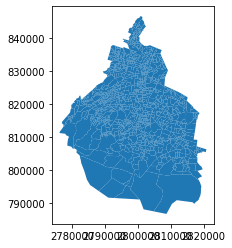

In [93]:
polygons.plot()

In [83]:
point = Point(19.359798,-99.161675)

In [85]:
with fiona.open("cps/shapes_cps\CP_CdMx/CP_09CdMx_v2.shp") as fiona_collection:

    # In this case, we'll assume the shapefile only has one record/layer (e.g., the shapefile
    # is just for the borders of a single country, etc.).
    for row in fiona_collection:
        shape = shapely.geometry.asShape( row['geometry'] )
    
        if shape.contains(point):
            print(point)
        else:
            print(shape)


POLYGON ((2794650.259300001 819469.0967999995, 2794601.180299997 819320.3825999983, 2794595.038099997 819303.2646000013, 2794581.846100003 819266.4985000007, 2794552.451700002 819177.5449000001, 2794539.257799998 819142.9415000007, 2794490.202399999 819013.9316000007, 2794461.8829 819006.0326999985, 2794333.362800002 818970.185899999, 2794287.639799997 818974.6688000001, 2794223.908 818980.9173000008, 2794210.812299997 818904.4486999999, 2794187.823399998 818901.436999999, 2794164.019500002 818896.5203000009, 2794128.538500004 818896.0044, 2794122.643299997 818895.9186999984, 2794077.665700004 818894.2122999988, 2794066.248400003 818891.7342999987, 2794046.369499996 818886.5003999993, 2794006.863200001 818880.5144000016, 2793988.908100002 818882.2074999996, 2793965.905199997 818887.1242000014, 2793955.3869 818892.3366999999, 2793903.004799999 818932.752799999, 2793796.985100001 818913.691399999, 2793741.294 818906.6301999986, 2793596.247299999 818889.4554999992, 2793571.957000002 81903

POLYGON ((2800728.289800003 818793.6031000018, 2800728.6888 818777.5665999986, 2800705.788800001 818784.5095999986, 2800659.438000001 818796.5001999997, 2800616.357199997 818805.625599999, 2800566.829400003 818819.8244000003, 2800515.701899998 818833.2934000008, 2800510.969700001 818850.6167000011, 2800522.324900001 818886.6405000016, 2800528.263599999 818915.7419000007, 2800533.9481 818938.0901999995, 2800539.682999998 818958.0581, 2800549.512100004 818981.6849999987, 2800578.541000001 819035.2479999997, 2800539.616599999 819057.0716000013, 2800549.257299997 819072.5546000004, 2800588.680100001 819143.3341999985, 2800606.915899999 819224.541099999, 2800594.175 819241.0430999994, 2800563.1761 819243.4761000015, 2800565.838699996 819268.5214000009, 2800575.813299999 819279.0621999986, 2800569.441299997 819292.5718999989, 2800572.110799998 819293.4818999991, 2800578.107799999 819295.5262999982, 2800608.214000002 819305.7895999998, 2800611.197700001 819306.8066999987, 2800630.888899997 81

POLYGON ((2797407.906499997 839278.8731000014, 2797368.218400002 839195.7765999995, 2797332.825800002 839125.0967000015, 2797314.614100002 839089.7954000011, 2797304.8917 839085.1517999992, 2797291.511299998 839045.9655999988, 2797271.933499999 838998.8202, 2797247.759000003 838949.1323999986, 2797214.1351 838883.0978000015, 2797214.040700004 838882.9072000012, 2797165.3081 838899.7355999984, 2797135.150399998 838911.4068000019, 2797112.036200002 838919.7369999997, 2797055.806199998 838940.7782000005, 2797065.473899998 838961.3506999984, 2797022.700599998 838979.550999999, 2796983.068999998 838996.7153000012, 2796960.665799998 839006.1614000015, 2796929.853399999 839005.1554000005, 2796918.5282 839004.4311, 2796866.467200004 839001.2630999982, 2796859.233999997 839000.7846000008, 2796825.825199999 838997.7540999986, 2796856.585900001 839070.6700000018, 2796922.173100002 839218.0978999995, 2796922.297200002 839218.3938999996, 2796971.976999998 839198.5888999999, 2797030.729099996 839339

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

